	1.	블루리본과 레드리본 리뷰갯수(plt.bar)
-> x축: 블루리본과 레드리본의 리본개수
     y축: 블루리본과 레드리본의 리뷰갯수

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:/Windows/Fonts/batang.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [58]:
df_googlex = pd.read_csv('./data/restaurant_review_without_googleMap.csv')
df_googlex

,restaurant_code,address,restaurant_name,restaurant_class,menu_tag,blue_ribbon_count,red_ribbon_count,catchTable_review_count,catchTable_review_point,googleMap_review_count,googleMap_review_point
0,1,서울특별시 성동구 서울숲4길 18-7 (성수동1가),플레이버타운,호프/통닭,퓨전중식,0,2,1271,4.6,0,0
1,2,서울특별시 성동구 뚝섬로15길 31 (성수동2가),매튜,기타,컨템포러리,2,0,893,4.8,0,0
2,3,서울특별시 성동구 성수이로14길 7 (성수동2가),세스크멘슬,기타,"샤퀴테리,독일식",2,0,67,4.6,0,0
3,4,서울특별시 성동구 왕십리로11길 7 (성수동1가),다로베,"외국음식전문점(인도,태국등)",피자,0,2,755,4.7,0,0
4,5,서울특별시 성동구 왕십리로 136 (성수동1가),팩피,경양식,파스타,0,2,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
881,904,서울특별시 마포구 와우산로29마길 5 (서교동),타파스나인,기타,타파스바,0,0,95,4.4,0,0
882,905,서울특별시 마포구 와우산로21길 36-12 (서교동),강수곱창,한식,돼지막창,0,0,0,0.0,0,0
883,906,서울특별시 마포구 와우산로29마길 6 (서교동),커피101,NaN,커피전문점,0,0,0,0.0,0,0
884,907,서울특별시 마포구 와우산로27길 74 (서교동),달의계단,까페,카페,0,0,0,0.0,0,0


In [59]:
df_googlex.describe()

,restaurant_code,blue_ribbon_count,red_ribbon_count,catchTable_review_count,catchTable_review_point,googleMap_review_count,googleMap_review_point
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.0,886.0
mean,457.762980,0.141084,0.100451,94.875847,1.205643,0.0,0.0
std,262.495301,0.393972,0.365241,336.653461,2.035302,0.0,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,229.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,456.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,685.750000,0.000000,0.000000,3.000000,4.100000,0.0,0.0
max,908.000000,2.000000,2.000000,5805.000000,5.000000,0.0,0.0


In [60]:
print(df_googlex.info())      # 결측값 확인
print(df_googlex.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   restaurant_code          886 non-null    int64  
 1   address                  886 non-null    object 
 2   restaurant_name          886 non-null    object 
 3   restaurant_class         771 non-null    object 
 4   menu_tag                 884 non-null    object 
 5   blue_ribbon_count        886 non-null    int64  
 6   red_ribbon_count         886 non-null    int64  
 7   catchTable_review_count  886 non-null    int64  
 8   catchTable_review_point  886 non-null    float64
 9   googleMap_review_count   886 non-null    int64  
 10  googleMap_review_point   886 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 76.3+ KB
None
restaurant_code              0
address                      0
restaurant_name              0
restaurant_class           115
m

In [61]:
df_googlex['restaurant_class'] = df_googlex['restaurant_class'].fillna('표기 없음')    # 결측치는 '표기 없음'으로 넣어줌.
df_googlex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   restaurant_code          886 non-null    int64  
 1   address                  886 non-null    object 
 2   restaurant_name          886 non-null    object 
 3   restaurant_class         886 non-null    object 
 4   menu_tag                 884 non-null    object 
 5   blue_ribbon_count        886 non-null    int64  
 6   red_ribbon_count         886 non-null    int64  
 7   catchTable_review_count  886 non-null    int64  
 8   catchTable_review_point  886 non-null    float64
 9   googleMap_review_count   886 non-null    int64  
 10  googleMap_review_point   886 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 76.3+ KB


In [62]:
df_googlex['menu_tag'] = df_googlex['menu_tag'].fillna('표기 없음')    # menu_tag 결측치는 '표기 없음'으로 넣어줌.
df_googlex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   restaurant_code          886 non-null    int64  
 1   address                  886 non-null    object 
 2   restaurant_name          886 non-null    object 
 3   restaurant_class         886 non-null    object 
 4   menu_tag                 886 non-null    object 
 5   blue_ribbon_count        886 non-null    int64  
 6   red_ribbon_count         886 non-null    int64  
 7   catchTable_review_count  886 non-null    int64  
 8   catchTable_review_point  886 non-null    float64
 9   googleMap_review_count   886 non-null    int64  
 10  googleMap_review_point   886 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 76.3+ KB


In [63]:
df_googlex[df_googlex.duplicated(['restaurant_code'])]      # 중복데이터 없음 확인

,restaurant_code,address,restaurant_name,restaurant_class,menu_tag,blue_ribbon_count,red_ribbon_count,catchTable_review_count,catchTable_review_point,googleMap_review_count,googleMap_review_point


In [ ]:
df_googlex = df_googlex.drop(['googleMap_review_count', 'googleMap_review_point'], axis=1)      # 없는 데이터 싹 날리고~
df_googlex

,restaurant_code,address,restaurant_name,restaurant_class,menu_tag,blue_ribbon_count,red_ribbon_count,catchTable_review_count,catchTable_review_point
0,1,서울특별시 성동구 서울숲4길 18-7 (성수동1가),플레이버타운,호프/통닭,퓨전중식,0,2,1271,4.6
1,2,서울특별시 성동구 뚝섬로15길 31 (성수동2가),매튜,기타,컨템포러리,2,0,893,4.8
2,3,서울특별시 성동구 성수이로14길 7 (성수동2가),세스크멘슬,기타,"샤퀴테리,독일식",2,0,67,4.6
3,4,서울특별시 성동구 왕십리로11길 7 (성수동1가),다로베,"외국음식전문점(인도,태국등)",피자,0,2,755,4.7
4,5,서울특별시 성동구 왕십리로 136 (성수동1가),팩피,경양식,파스타,0,2,0,0.0
...,...,...,...,...,...,...,...,...,...
881,904,서울특별시 마포구 와우산로29마길 5 (서교동),타파스나인,기타,타파스바,0,0,95,4.4
882,905,서울특별시 마포구 와우산로21길 36-12 (서교동),강수곱창,한식,돼지막창,0,0,0,0.0
883,906,서울특별시 마포구 와우산로29마길 6 (서교동),커피101,표기 없음,커피전문점,0,0,0,0.0
884,907,서울특별시 마포구 와우산로27길 74 (서교동),달의계단,까페,카페,0,0,0,0.0


In [67]:
df_googlemap = pd.read_csv('./data/googlemap_data.csv')
df_googlemap

,Unnamed: 0,restaurant_name,googleMap_review_point,googleMap_review_count,address
0,0,"연화주반, 홍대 연남동 맛집 & 술집ㅣYeonhwa Jooban, Hongdae r...",5.0,25,마포구 동교동 4층
1,1,바다화원 본점,4.4,86,성동구 성수동1가 상원4길 6-1
2,2,밀포유 인사동점,4.9,53,종로구 인사동8길 13 밀포유 1층
3,3,스시지현,4.6,180,마포구 연남동 373-13
4,4,성수AGU (聖水洞 グルメ店 Seongsu-dong Restaurant),4.9,218,성동구 상원길 48-1
...,...,...,...,...,...
174,174,리타르단도(Ritardando),4.9,78,성동구 뚝섬로 393 지하 1층
175,175,버섯집,4.3,451,성동구 왕십리로5길 9-10
176,176,성수 맛집 스케줄성수 / schedule seongsu – a must-visit ...,4.8,789,성동구 아차산로 104 2층
177,177,미도인 홍대,4.5,166,마포구 잔다리로2길 19


In [71]:
df= df_googlex.merge(df_googlemap, on='address', how='left')
df
df = df.drop('Unnamed: 0', axis=1)
df

,restaurant_code,address,restaurant_name_x,restaurant_class,menu_tag,blue_ribbon_count,red_ribbon_count,catchTable_review_count,catchTable_review_point,restaurant_name_y,googleMap_review_point,googleMap_review_count
0,1,서울특별시 성동구 서울숲4길 18-7 (성수동1가),플레이버타운,호프/통닭,퓨전중식,0,2,1271,4.6,NaN,NaN,NaN
1,2,서울특별시 성동구 뚝섬로15길 31 (성수동2가),매튜,기타,컨템포러리,2,0,893,4.8,NaN,NaN,NaN
2,3,서울특별시 성동구 성수이로14길 7 (성수동2가),세스크멘슬,기타,"샤퀴테리,독일식",2,0,67,4.6,NaN,NaN,NaN
3,4,서울특별시 성동구 왕십리로11길 7 (성수동1가),다로베,"외국음식전문점(인도,태국등)",피자,0,2,755,4.7,NaN,NaN,NaN
4,5,서울특별시 성동구 왕십리로 136 (성수동1가),팩피,경양식,파스타,0,2,0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
881,904,서울특별시 마포구 와우산로29마길 5 (서교동),타파스나인,기타,타파스바,0,0,95,4.4,NaN,NaN,NaN
882,905,서울특별시 마포구 와우산로21길 36-12 (서교동),강수곱창,한식,돼지막창,0,0,0,0.0,NaN,NaN,NaN
883,906,서울특별시 마포구 와우산로29마길 6 (서교동),커피101,표기 없음,커피전문점,0,0,0,0.0,NaN,NaN,NaN
884,907,서울특별시 마포구 와우산로27길 74 (서교동),달의계단,까페,카페,0,0,0,0.0,NaN,NaN,NaN


In [72]:
df = df.rename(columns={'restaurant_name_x': 'restaurant_name'})
df = df.drop('restaurant_name_y', axis=1)
df

,restaurant_code,address,restaurant_name,restaurant_class,menu_tag,blue_ribbon_count,red_ribbon_count,catchTable_review_count,catchTable_review_point,googleMap_review_point,googleMap_review_count
0,1,서울특별시 성동구 서울숲4길 18-7 (성수동1가),플레이버타운,호프/통닭,퓨전중식,0,2,1271,4.6,NaN,NaN
1,2,서울특별시 성동구 뚝섬로15길 31 (성수동2가),매튜,기타,컨템포러리,2,0,893,4.8,NaN,NaN
2,3,서울특별시 성동구 성수이로14길 7 (성수동2가),세스크멘슬,기타,"샤퀴테리,독일식",2,0,67,4.6,NaN,NaN
3,4,서울특별시 성동구 왕십리로11길 7 (성수동1가),다로베,"외국음식전문점(인도,태국등)",피자,0,2,755,4.7,NaN,NaN
4,5,서울특별시 성동구 왕십리로 136 (성수동1가),팩피,경양식,파스타,0,2,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
881,904,서울특별시 마포구 와우산로29마길 5 (서교동),타파스나인,기타,타파스바,0,0,95,4.4,NaN,NaN
882,905,서울특별시 마포구 와우산로21길 36-12 (서교동),강수곱창,한식,돼지막창,0,0,0,0.0,NaN,NaN
883,906,서울특별시 마포구 와우산로29마길 6 (서교동),커피101,표기 없음,커피전문점,0,0,0,0.0,NaN,NaN
884,907,서울특별시 마포구 와우산로27길 74 (서교동),달의계단,까페,카페,0,0,0,0.0,NaN,NaN


In [75]:
df['review_count'] = df['catchTable_review_count'].fillna(0) + df['googleMap_review_count'].fillna(0)
df

,restaurant_code,address,restaurant_name,restaurant_class,menu_tag,blue_ribbon_count,red_ribbon_count,catchTable_review_count,catchTable_review_point,googleMap_review_point,googleMap_review_count,review_count
0,1,서울특별시 성동구 서울숲4길 18-7 (성수동1가),플레이버타운,호프/통닭,퓨전중식,0,2,1271,4.6,NaN,NaN,1271.0
1,2,서울특별시 성동구 뚝섬로15길 31 (성수동2가),매튜,기타,컨템포러리,2,0,893,4.8,NaN,NaN,893.0
2,3,서울특별시 성동구 성수이로14길 7 (성수동2가),세스크멘슬,기타,"샤퀴테리,독일식",2,0,67,4.6,NaN,NaN,67.0
3,4,서울특별시 성동구 왕십리로11길 7 (성수동1가),다로베,"외국음식전문점(인도,태국등)",피자,0,2,755,4.7,NaN,NaN,755.0
4,5,서울특별시 성동구 왕십리로 136 (성수동1가),팩피,경양식,파스타,0,2,0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
881,904,서울특별시 마포구 와우산로29마길 5 (서교동),타파스나인,기타,타파스바,0,0,95,4.4,NaN,NaN,95.0
882,905,서울특별시 마포구 와우산로21길 36-12 (서교동),강수곱창,한식,돼지막창,0,0,0,0.0,NaN,NaN,0.0
883,906,서울특별시 마포구 와우산로29마길 6 (서교동),커피101,표기 없음,커피전문점,0,0,0,0.0,NaN,NaN,0.0
884,907,서울특별시 마포구 와우산로27길 74 (서교동),달의계단,까페,카페,0,0,0,0.0,NaN,NaN,0.0


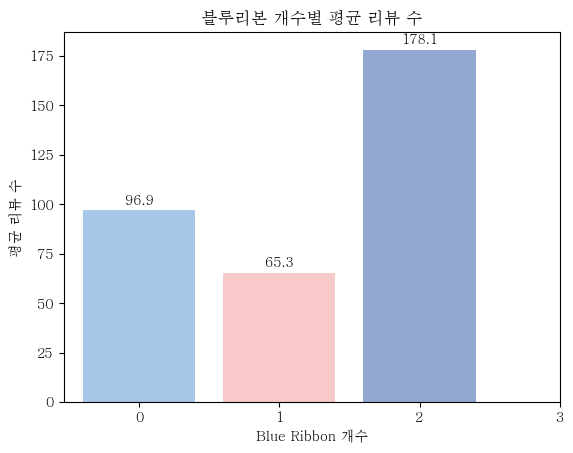

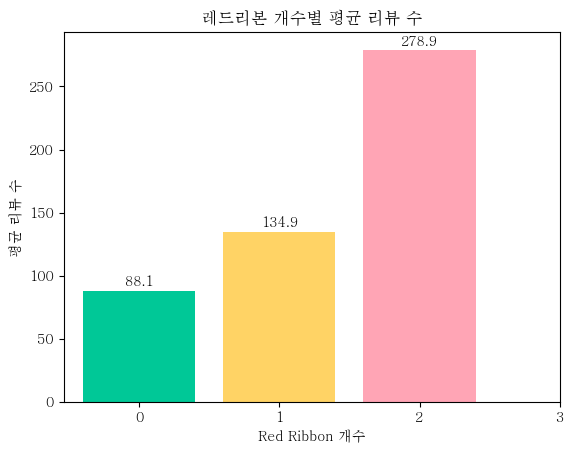

In [86]:
# 블루리본 개수별 평균 리뷰 수
group_by_blueribbon = df.groupby('blue_ribbon_count')['review_count'].mean()  # 평균
# grouped = df.groupby('blue_ribbon_count')['restaurant_review_count'].sum()  # 합계로 볼 경우

# 2. 차트 그리기
bar_colors = ['#a7c7e7',  # 파스텔 블루
          '#f7cac9',  # 파스텔 핑크
          '#92a8d1']
plt.bar(group_by_blueribbon.index, group_by_blueribbon.values, color=bar_colors)
plt.xlabel('Blue Ribbon 개수')
plt.ylabel('평균 리뷰 수')  # 합계면 '리뷰 수 합계'
plt.title('블루리본 개수별 평균 리뷰 수')
plt.xticks([0, 1, 2, 3])
for idx, value in zip(group_by_blueribbon.index, group_by_blueribbon.values):
    plt.text(idx, value + 2,    # x위치, y위치(막대 위에 2만큼 띄워줌)
             f'{value:.1f}',    # 소수점 1자리
             ha='center', va='bottom')
plt.show()


# 레드리본 개수별 평균 리뷰 수
group_by_redribbon = df.groupby('red_ribbon_count')['review_count'].mean()  # 평균

colors = ['#00C897',  # 민트
          '#FFD365',  # 연노랑
          '#FFA5B5']
plt.bar(group_by_redribbon.index, group_by_redribbon.values, color=colors)
plt.xlabel('Red Ribbon 개수')
plt.ylabel('평균 리뷰 수')  # 합계면 '리뷰 수 합계'
plt.title('레드리본 개수별 평균 리뷰 수')
plt.xticks([0, 1, 2, 3])
for idx, value in zip(group_by_redribbon.index, group_by_redribbon.values):
    plt.text(idx, value + 2,    # x위치, y위치(막대 위에 2만큼 띄워줌)
             f'{value:.1f}',    # 소수점 1자리
             ha='center', va='bottom')
plt.show()

In [90]:
df[df.duplicated(['address'], keep=False)]

,restaurant_code,address,restaurant_name,restaurant_class,menu_tag,blue_ribbon_count,red_ribbon_count,catchTable_review_count,catchTable_review_point,googleMap_review_point,googleMap_review_count,review_count
4,5,서울특별시 성동구 왕십리로 136 (성수동1가),팩피,경양식,파스타,0,2,0,0.0,NaN,NaN,0.0
54,60,서울특별시 성동구 상원1길 35-22 (성수동1가),타코스퀘어,"외국음식전문점(인도,태국등)",멕시코식,1,0,0,0.0,NaN,NaN,0.0
57,63,서울특별시 성동구 상원1길 35-22 (성수동1가),주도,한식,"한식주점,일반한식",1,0,0,0.0,NaN,NaN,0.0
73,79,서울특별시 성동구 아차산로3길 9 (성수동1가),성일정육점,호프/통닭,"김치찌개,소고기구이",0,0,0,0.0,NaN,NaN,0.0
78,84,서울특별시 성동구 성수일로1길 8 (성수동1가),코너룸,경양식,와인바,0,0,699,4.7,NaN,NaN,699.0
81,88,서울특별시 성동구 아차산로3길 9 (성수동1가),성일정육식당,기타,소고기구이,0,0,0,0.0,NaN,NaN,0.0
96,103,서울특별시 성동구 연무장9길 8-1 (성수동2가),호감도,기타,이자카야,0,0,475,4.7,NaN,NaN,475.0
114,121,서울특별시 성동구 아차산로17길 48 (성수동2가),원기옥,한식,한정식,0,0,0,0.0,NaN,NaN,0.0
135,142,서울특별시 성동구 서울숲4길 22-18 (성수동1가),콩카세,경양식,이탈리아식,0,0,859,4.6,NaN,NaN,859.0
150,157,서울특별시 성동구 성수일로1길 8 (성수동1가),뇨끼룸,경양식,"뇨키,파스타",0,0,548,4.7,NaN,NaN,548.0


In [93]:
df_total = pd.read_csv('./data/total_data.csv')
df_total

,Unnamed: 0,restaurant_code,address,restaurant_name,restaurant_class,menu_tag,blue_ribbon_count,red_ribbon_count,catchTable_review_count,catchTable_review_point,googleMap_review_count,googleMap_review_point
0,0,1,서울특별시 성동구 서울숲4길 18-7 (성수동1가),플레이버타운,호프/통닭,퓨전중식,0,2,1271,4.6,0,0.0
1,1,2,서울특별시 성동구 뚝섬로15길 31 (성수동2가),매튜,기타,컨템포러리,2,0,893,4.8,0,0.0
2,2,3,서울특별시 성동구 성수이로14길 7 (성수동2가),세스크멘슬,기타,"샤퀴테리,독일식",2,0,67,4.6,378,4.6
3,3,4,서울특별시 성동구 왕십리로11길 7 (성수동1가),다로베,"외국음식전문점(인도,태국등)",피자,0,2,755,4.7,0,0.0
4,4,5,서울특별시 성동구 왕십리로 136 (성수동1가),팩피,경양식,파스타,0,2,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
835,881,904,서울특별시 마포구 와우산로29마길 5 (서교동),타파스나인,기타,타파스바,0,0,95,4.4,0,0.0
836,882,905,서울특별시 마포구 와우산로21길 36-12 (서교동),강수곱창,한식,돼지막창,0,0,0,0.0,0,0.0
837,883,906,서울특별시 마포구 와우산로29마길 6 (서교동),커피101,NaN,커피전문점,0,0,0,0.0,0,0.0
838,884,907,서울특별시 마포구 와우산로27길 74 (서교동),달의계단,까페,카페,0,0,0,0.0,0,0.0


In [115]:
# 캐치테이블 평점 별 리뷰 갯수

bins = [0, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# 구간 레이블(원하는 대로 설정 가능)
labels = ['0~1.0', '1.0~1.5', '1.5~2.0', '2.0~2.5', '2.5~3.0', '3.0~3.5', '3.5~4.0', '4.0~4.5', '4.5~5.0']

# 구간별로 분류하는 새 컬럼 생성
df_total['point_bin'] = pd.cut(df_total['catchTable_review_point'], bins=bins, labels=labels, include_lowest=True, right=True)

group_by_review_count = df_total.groupby('point_bin')['catchTable_review_count'].mean()
print(group_by_review_count)

point_bin
0~1.0        0.000000
1.0~1.5           NaN
1.5~2.0           NaN
2.0~2.5           NaN
2.5~3.0           NaN
3.0~3.5           NaN
3.5~4.0     91.500000
4.0~4.5    359.753846
4.5~5.0    386.679739
Name: catchTable_review_count, dtype: float64


C:\Users\Playdata\AppData\Local\Temp\ipykernel_18296\1723186240.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_by_review_count = df_total.groupby('point_bin')['catchTable_review_count'].mean()


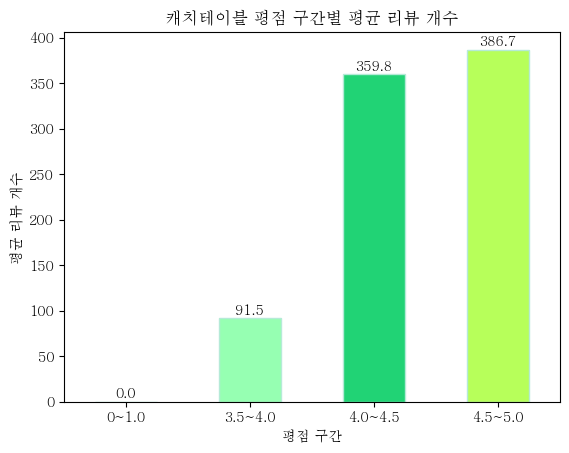

In [117]:
group_by_review_count_nonan = group_by_review_count.dropna()

colors = ["#B7FF5A", "#96FFB2", "#21D375"]
group_by_review_count_nonan.plot(kind='bar', color=colors, edgecolor='#B5EAD7')
plt.xlabel('평점 구간')
plt.ylabel('평균 리뷰 개수')
plt.title('캐치테이블 평점 구간별 평균 리뷰 개수')
plt.xticks(rotation=0)


for i, value in enumerate(group_by_review_count_nonan.values):
    plt.text(i, value + 2, f'{value:.1f}', ha='center', va='bottom')
plt.show()

point_bin
0~1.0        0.000000
1.0~1.5           NaN
1.5~2.0           NaN
2.0~2.5           NaN
2.5~3.0           NaN
3.0~3.5           NaN
3.5~4.0    186.000000
4.0~4.5    369.236842
4.5~5.0    166.608696
Name: googleMap_review_count, dtype: float64


C:\Users\Playdata\AppData\Local\Temp\ipykernel_18296\1680692037.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_by_review_count = df_total.groupby('point_bin')['googleMap_review_count'].mean()


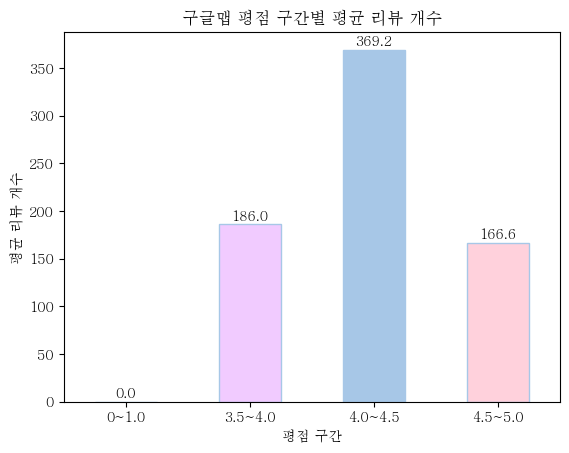

In [126]:
#구글맵 평점별 평균 리뷰 개수
bins = [0, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# 구간 레이블(원하는 대로 설정 가능)
labels = ['0~1.0', '1.0~1.5', '1.5~2.0', '2.0~2.5', '2.5~3.0', '3.0~3.5', '3.5~4.0', '4.0~4.5', '4.5~5.0']

# 구간별로 분류하는 새 컬럼 생성
df_total['point_bin'] = pd.cut(df_total['googleMap_review_point'], bins=bins, labels=labels, include_lowest=True, right=True)

group_by_review_count = df_total.groupby('point_bin')['googleMap_review_count'].mean()
print(group_by_review_count)


group_by_review_count_nonan = group_by_review_count.dropna()

colors_ = ["#FFD1DC", "#F1CBFF", "#a7c7e7"]
group_by_review_count_nonan.plot(kind='bar', color=colors_, edgecolor='#a7c7e7')
plt.xlabel('평점 구간')
plt.ylabel('평균 리뷰 개수')
plt.title('구글맵 평점 구간별 평균 리뷰 개수')
plt.xticks(rotation=0)


for i, value in enumerate(group_by_review_count_nonan.values):
    plt.text(i, value + 2, f'{value:.1f}', ha='center', va='bottom')
plt.show()